<a href="https://colab.research.google.com/github/VCosmo/VCosmo_Repo/blob/main/H0analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gal4H0 import *
from scipy.stats import gaussian_kde
true_cosmology = FlatLambdaCDM(H0=70.,Om0=0.25) # True cosmology

In [ ]:
import pandas as pd
# Define the path to the catalog compressed CSV file:
catalog_filename = "/home/Virgo_Lab/13826.csv.bz2"
# Define the list of columns that uniquely identify each row
data = pd.read_csv(catalog_filename, sep=",", comment='#', na_values=r'\N', compression='bz2')

abs_M=data['abs_mag_r'].to_numpy()[0:10:]
galaxies_list=data['z'].to_numpy()[0:10:]
Labs=M2L(abs_M)
app_m=M2m(abs_M, true_cosmology.luminosity_distance(galaxies_list).to('Mpc').value)
print(len(app_m))

10


0.1
You detected 10 binaries out of 100000 simulated


running on H0: 4000it [00:01, 3710.60it/s]


H0_mean ( 0 ) = 68.30707676919229 + 1.940485121280318 - 1.9604901225306293


running on H0: 4000it [00:01, 3721.52it/s]


H0_mean ( 1 ) = 68.30707676919229 + 1.940485121280318 - 1.9604901225306293


running on H0: 4000it [00:01, 3644.80it/s]


H0_mean ( 2 ) = 68.30707676919229 + 1.940485121280318 - 1.9604901225306293
0.2
You detected 10 binaries out of 100000 simulated


running on H0: 4000it [00:01, 2824.93it/s]


H0_mean ( 0 ) = 69.84746186546636 + 3.860965241310339 - 3.880970242560636


running on H0: 4000it [00:01, 2012.08it/s]


H0_mean ( 1 ) = 69.80745186296573 + 3.880970242560636 - 3.860965241310325


running on H0: 4000it [00:01, 2088.79it/s]


H0_mean ( 2 ) = 69.76744186046511 + 3.880970242560636 - 3.880970242560636
0.3
You detected 10 binaries out of 100000 simulated


running on H0: 4000it [00:01, 3690.14it/s]


H0_mean ( 0 ) = 73.52838209552388 + 6.1615403850962736 - 6.021505376344095


running on H0: 4000it [00:01, 3685.87it/s]


H0_mean ( 1 ) = 73.36834208552138 + 6.2215553888472215 - 6.061515378844703


running on H0: 4000it [00:01, 3700.29it/s]


H0_mean ( 2 ) = 72.78819704926232 + 6.461615403850956 - 6.161540385096288


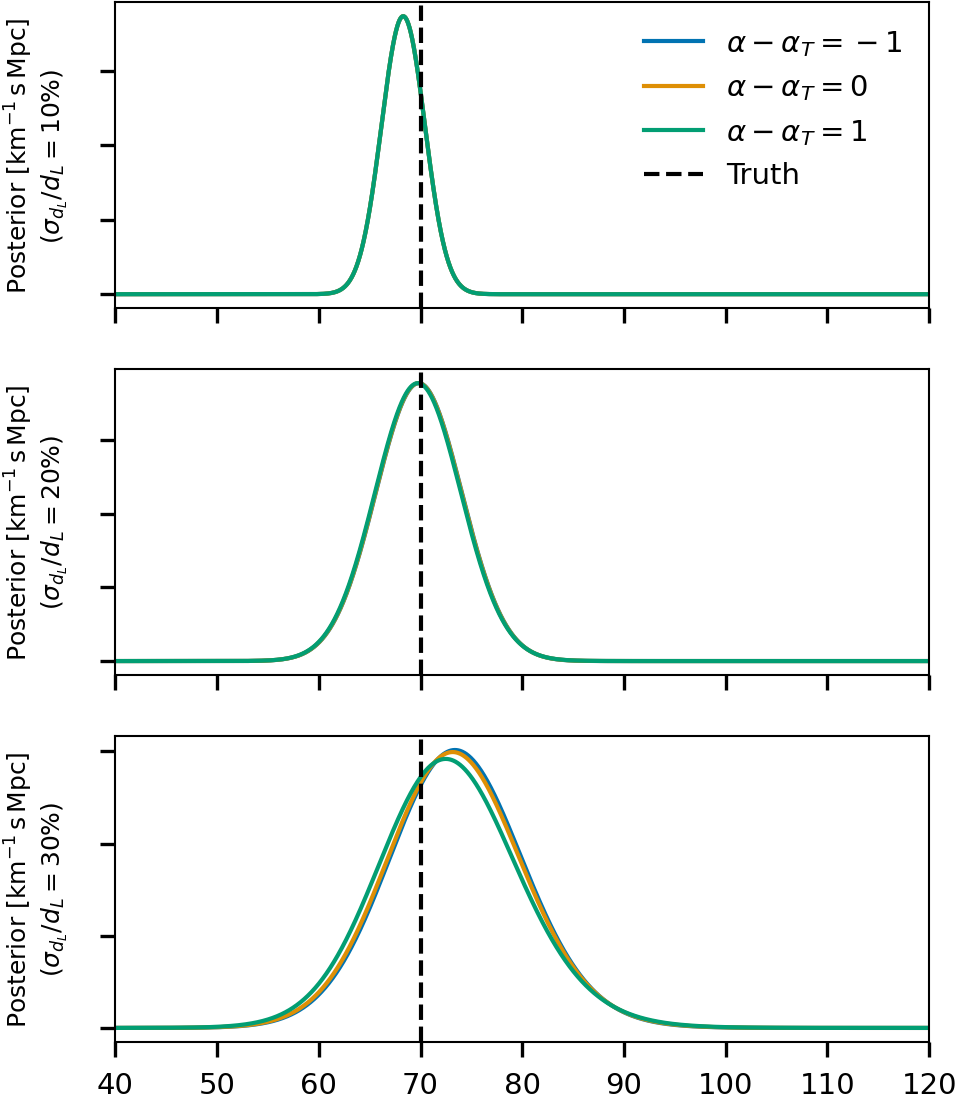

In [ ]:
np.random.seed(1) #Random seed

alpha=1
alphas= [alpha-1, alpha, alpha+1]
sigmas=[0.1,0.2,0.3]
Ngw=10
zcut_rate=1.4
dl_thr=1550
H0_array=np.linspace(40,120,4000)

posteriors={'H0_grid':H0_array}

###########################################################

fig, ax= plt.subplots(3,1,figsize=(3.5,4.5),sharex=True)
colors=[pal[0],pal[1],pal[2]]
lines=['solid','--',':']

labels_1=[r'$\alpha-\alpha_{T}=-1$',
        r'$\alpha-\alpha_{T}=0$',
        r'$\alpha-\alpha_{T}=1$',]

labels_2=[r'$\sigma_{d_L}/d_L=10\%$',
         r'$\sigma_{d_L}/d_L=20\%$',
         r'$\sigma_{d_L}/d_L=30\%$']


#########################################################

for j in range(3):
    print(sigmas[j])
    sigma_dl=sigmas[j]
    gw_obs_dl,_,_,std_dl=draw_gw_events_L(Ngw,sigma_dl,dl_thr,galaxies_list,true_cosmology,zcut_rate, Labs, alpha) #observed dL; std used to draw sample

    for i in range(3):
        posterior_matrix,combined=galaxy_catalog_analysis_accurate_redshift_L(H0_array,galaxies_list,zcut_rate,gw_obs_dl,sigma_dl,dl_thr, app_m, alphas[i])

        posteriors['L_'+str(sigmas[j])+'_'+'signle']=posterior_matrix
        posteriors['L_'+str(sigmas[j])+'_'+'combined']=combined

        ax[j].plot(H0_array,posteriors['L_'+str(sigmas[j])+'_'+'combined'],ls='solid',color=colors[i],label=labels_1[i])

        cumulative = np.cumsum(combined)

        min = H0_array[np.where(cumulative > 0.18*49.9875025)[0][0]]
        mean = H0_array[np.where(cumulative > 0.50*49.9875025)[0][0]]
        max = H0_array[np.where(cumulative > 0.82*49.9875025)[0][0]]

        print('H0_mean (', alphas[i],') =',mean, '+', max - mean, '-', mean - min)

for j in range(3):
    ax[j].axvline(70.,ls='--',color='k',label='Truth')
    ax[j].set_xlim([40,120])
    ax[j].yaxis.set_ticklabels([])
    ax[j].set_ylabel(r'Posterior ${\rm[km^{-1} \,s \,Mpc]}$'+'\n'+'('+labels_2[j]+')',fontsize=6)

ax[0].legend(frameon=False,ncol=1)

#define the path in wich you want to save the posteriors as png
plt.tight_layout()
plt.savefig('/home/Virgo_Lab/Posteriors/IF_1000_1000_cat6.png')
